<a href="https://visit.figure-eight.com/rs/416-ZBE-142/images/CrowdFlower_DataScienceReport.pdf" target="_blank">
DATA SCIENTIST REPORT 2017 - Adquisición y limpieza de datos consume la mayor parte del tiempo en un proyecto</a></br>

In [1]:
#1 Analisis Exploratorio de Datos (EDA)
#Estructura básica (nro filas, nro de columnas, tipo de dato de las columnas, explorar el head y tail)
#  filas/columnas = observaciones/variables
#Comprender los datos con estadísticas básicas (categorico/nominal, ordinal, contínuo), 
#calidad de datos: datos faltantes, valores atípicos

#2 Preparación de datos (Data Wrangling/Data Munging)
#Reemplazar, eliminar datos faltantes, valores atípicos, realizar sumarizaciones, re-shaping

#Herramentas
#Numpy: módulos para manipulación de arreglos y matrices
#Pandas: manipulación de tablas (DataFrames)


<a href="https://www.numpy.org/" target="_blank">Numpy</a></br>
<a href="https://pandas.pydata.org/" target="_blank">Python Data Analysis Library (Pandas)</a></br>
<a href="https://docs.python.org/3/library/functions.html#open" target="_blank">Abrir un archivo</a></br>
<a href="http://elornitorrincoenmascarado.blogspot.com/2006/10/python-25-la-sentencia-with.html" target="_blank">With - Gestores de contexto</a></br>

In [2]:
import requests
csv_url = "https://www.datos.gov.co/api/views/6zi7-wwa7/rows.csv?accessType=DOWNLOAD"
#respuesta = requests.get(csv_url)
#with open("archivo.csv", "wb") as archivo:
    #archivo.write(respuesta.content)

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
ruta_archivo = os.path.join("titanic", "train.csv")
print(ruta_archivo)
df = pd.read_csv(ruta_archivo, index_col='PassengerId')

titanic/train.csv


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
#info() muestra un resumen del DataFrame
#Pclass 
#SibSp numero hermanos , espos@   
#Parch numero padres , hij@s)
#Embarked punto de embarque C=Cherburgo Q=Queenstown S= Southampton
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [8]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
#Concetenar DFs
#df = pd.concat((df_01, df_02),axis=0)
#Agregar columnas/variables
df["NuevaVariable"] = "Test"
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NuevaVariable
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Test
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Test
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Test
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Test
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Test


In [10]:
#del df["NuevaVariable"]
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NuevaVariable
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Test
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Test
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Test
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Test
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Test


In [11]:
#Igual que df.Name
df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [12]:
type(df.Fare)

pandas.core.series.Series

In [13]:
df[['Name','Age']].head(5)

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


In [14]:
#Seleccionar por filas y columnas
df.loc[7:10, ['Name','Age']]

,Name,Age
PassengerId,,
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


In [15]:
df.loc[0:5, "Name":"Age"]

,Name,Sex,Age
PassengerId,,,
1,"Braund, Mr. Owen Harris",male,22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,"Heikkinen, Miss. Laina",female,26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,"Allen, Mr. William Henry",male,35.0


In [16]:
df.iloc[0:5, 2:5]

,Name,Sex,Age
PassengerId,,,
1,"Braund, Mr. Owen Harris",male,22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,"Heikkinen, Miss. Laina",female,26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,"Allen, Mr. William Henry",male,35.0


In [17]:
#Filtrado
varones = df.loc[df.Sex == 'male',:]
print(type(varones))
varones.head(5)

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NuevaVariable
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Test
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Test
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Test
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Test
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Test


In [18]:
varones_en_primera_clase = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
varones_en_primera_clase.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NuevaVariable
PassengerId,,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Test
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Test
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Test
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Test
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,Test


In [19]:
#Estadisticas
#Numerico: centralidad (media,mediana) y dispersion (rango, percentiles y desviacion estandar)
#Categorico: conteo, valores unicos, proporciones

#Numerico:
#centralidad
#  Media/Promedio, sensible a valores atípicos
#  Mediana
#dispersion (que tan lejos están de la tendencia central da una idea de la variabilidad de los dato)
#  rango: max - min, sensible a valores atípicos
#  percentiles: percentile X es Y, el X% de los valores son menores a Y
#    valores usuales para X 25, 50, 75 Quartiles
#  desviacion estandar: distancia de los valores con la media, sensible a valores atípicos
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
print('Promedio del precio  : {0}'.format(df.Fare.mean()))
print('Mediana del precio : {0}'.format(df.Fare.median()))

Promedio del precio  : 32.204207968574636
Mediana del precio : 14.4542


In [21]:
#Nan porque hay valores faltantes
print('Min precio : {0}'.format(df.Fare.min())) 
print('Max precio : {0}'.format(df.Fare.max()))
print('Rango precio : {0}'.format(df.Fare.max()  - df.Fare.min()))
print('25 percentil : {0}'.format(df.Fare.quantile(.25)))
print('50 percentil : {0}'.format(df.Fare.quantile(.5)))
print('75 percentil : {0}'.format(df.Fare.quantile(.75)))
print('Desviacion estandar precio : {0}'.format(df.Fare.std()))

Min precio : 0.0
Max precio : 512.3292
Rango precio : 512.3292
25 percentil : 7.9104
50 percentil : 14.4542
75 percentil : 31.0
Desviacion estandar precio : 49.6934285971809


In [22]:
%matplotlib inline

<AxesSubplot:>

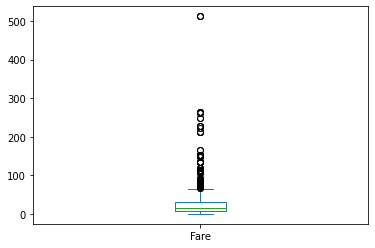

In [23]:
#gráfico box-whisker
df.Fare.plot(kind='box')

In [24]:
#Categorico:
#centralidad
#  Media/Promedio, sensible a valores atípicos
#  Mediana
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NuevaVariable
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,1
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Test
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,891
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [25]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [27]:
#Cuántos sobrevivieron? (Ejercicio)
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

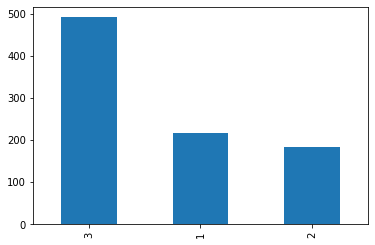

In [28]:
df.Pclass.value_counts().plot(kind='bar')

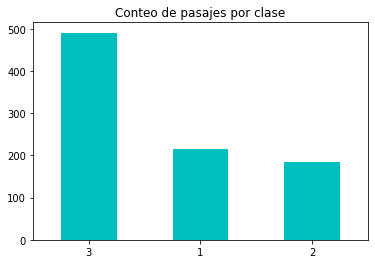

In [29]:
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Conteo de pasajes por clase', color='c');